<a href="https://colab.research.google.com/github/LibinBabu2003/data-science-journey/blob/main/Fetal_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Conversion**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/fetal_health.csv')
print("File loaded successfully!")
print("Original class distribution:")
print(df['fetal_health'].value_counts())

df['fetal_health'] = df['fetal_health'].map({1.0: 0, 2.0: 1, 3.0: 1})
print("\nNew binary class distribution:")
print(df['fetal_health'].value_counts())



File loaded successfully!
Original class distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

New binary class distribution:
fetal_health
0    1655
1     471
Name: count, dtype: int64


# **Outlier detection and capping**

In [ ]:
print("Starting outlier capping and verification process...\n")

features_to_cap = df.drop(columns=['fetal_health']).columns

for column in features_to_cap:

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers_before = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    print(f"--- Analyzing '{column}': Found {len(outliers_before)} outliers.")

    df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)

    outliers_after = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    print(f"Verification: New outlier count is {len(outliers_after)}.")
    print("-" * 40)

print("\nOutlier capping and verification complete!")

Starting outlier capping and verification process...

--- Analyzing 'baseline value': Found 0 outliers.
Verification: New outlier count is 0.
----------------------------------------
--- Analyzing 'accelerations': Found 14 outliers.
Verification: New outlier count is 0.
----------------------------------------
--- Analyzing 'fetal_movement': Found 307 outliers.
Verification: New outlier count is 0.
----------------------------------------
--- Analyzing 'uterine_contractions': Found 1 outliers.
Verification: New outlier count is 0.
----------------------------------------
--- Analyzing 'light_decelerations': Found 150 outliers.
Verification: New outlier count is 0.
----------------------------------------
--- Analyzing 'severe_decelerations': Found 7 outliers.
Verification: New outlier count is 0.
----------------------------------------
--- Analyzing 'prolongued_decelerations': Found 178 outliers.
Verification: New outlier count is 0.
----------------------------------------
--- Analyz

checking Missing values

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


# Feature Engineering

In [ ]:

df['total_decelerations'] = df['light_decelerations'] + df['severe_decelerations'] + df['prolongued_decelerations']


print(df[['light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'total_decelerations']])

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      total_decelerations  
0                   0.000  
1                  

In [ ]:
df['accel_decel_ratio'] = np.where(
    df['total_decelerations'] == 0,
    0,
    df['accelerations'] / df['total_decelerations']
)


print(df[['accelerations', 'total_decelerations', 'accel_decel_ratio']].head())

   accelerations  total_decelerations  accel_decel_ratio
0          0.000                0.000                0.0
1          0.006                0.003                2.0
2          0.003                0.003                1.0
3          0.003                0.003                1.0
4          0.007                0.000                0.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of our original features (X):", X.shape)
print("Shape of our training features (X_train):", X_train.shape)
print("Shape of our testing features (X_test):", X_test.shape)

Shape of our original features (X): (2126, 23)
Shape of our training features (X_train): (1700, 23)
Shape of our testing features (X_test): (426, 23)


# Over sampling

In [ ]:
print(y_train.value_counts())

fetal_health
0    1322
1     378
Name: count, dtype: int64


Smote

In [ ]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.shape)
print("Original training set class distribution:")
print(y_train.value_counts())

print("\nResampled training set shape:", y_train_smote.shape)
print("Resampled training set class distribution:")
print(y_train_smote.value_counts())

Original training set shape: (1700,)
Original training set class distribution:
fetal_health
0    1322
1     378
Name: count, dtype: int64

Resampled training set shape: (2644,)
Resampled training set class distribution:
fetal_health
0    1322
1    1322
Name: count, dtype: int64


**Scaling**

In [ ]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_smote)

X_test_scaled = scaler.transform(X_test)

print("Mean of the first feature in X_train_scaled:", X_train_scaled[:, 0].mean())

print("Standard Deviation of the first feature in X_train_scaled:", X_train_scaled[:, 0].std())

Mean of the first feature in X_train_scaled: 1.3006909383808189e-15
Standard Deviation of the first feature in X_train_scaled: 1.0


# Logistic Regression

Train

In [ ]:

from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train_scaled, y_train_smote)

print("Logistic Regression model has been successfully trained!")

Logistic Regression model has been successfully trained!


Evaluation(Testing)

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_log_reg = log_reg.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Overall Accuracy: {accuracy:.2f}")
print("-" * 30)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("-" * 30)

print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Overall Accuracy: 0.85
------------------------------
Confusion Matrix:
[[278  55]
 [  9  84]]
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       333
           1       0.60      0.90      0.72        93

    accuracy                           0.85       426
   macro avg       0.79      0.87      0.81       426
weighted avg       0.89      0.85      0.86       426



# **SVM**

Train

In [ ]:

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_scaled, y_train_smote)

print("SVM model has been successfully trained!")

SVM model has been successfully trained!


Testing

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Overall Accuracy (SVM): {accuracy_svm:.2f}")
print("-" * 30)

print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))
print("-" * 30)

print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Overall Accuracy (SVM): 0.90
------------------------------
Confusion Matrix (SVM):
[[299  34]
 [  7  86]]
------------------------------
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       333
           1       0.72      0.92      0.81        93

    accuracy                           0.90       426
   macro avg       0.85      0.91      0.87       426
weighted avg       0.92      0.90      0.91       426



# Hyperparameter Tuning

**GRID Search in SVM**

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, refit=True, verbose=2)

grid_svm.fit(X_train_scaled, y_train_smote)

print("\nBest parameters found for SVM:", grid_svm.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.3s
[CV] END ..................................C=0.1

 **Performance of the TUNED SVM Model**

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_svm_tuned = grid_svm.predict(X_test_scaled)

print("--- Performance of the TUNED SVM Model ---")

accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
print(f"Overall Accuracy (Tuned SVM): {accuracy_svm_tuned:.2f}")
print("-" * 30)

print("Confusion Matrix (Tuned SVM):")
print(confusion_matrix(y_test, y_pred_svm_tuned))
print("-" * 30)

print("Classification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_svm_tuned))

--- Performance of the TUNED SVM Model ---
Overall Accuracy (Tuned SVM): 0.95
------------------------------
Confusion Matrix (Tuned SVM):
[[322  11]
 [ 11  82]]
------------------------------
Classification Report (Tuned SVM):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       333
           1       0.88      0.88      0.88        93

    accuracy                           0.95       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



**Grid search in Logistic Regression**

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_reg, refit=True, verbose=2)

grid_log_reg.fit(X_train_scaled, y_train_smote)

print("\nBest parameters found for Logistic Regression:", grid_log_reg.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

**Performance of the TUNED Logistic Regression**

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_log_reg_tuned = grid_log_reg.predict(X_test_scaled)

print("--- Performance of the TUNED Logistic Regression Model ---")

accuracy_log_reg_tuned = accuracy_score(y_test, y_pred_log_reg_tuned)
print(f"Overall Accuracy (Tuned LogReg): {accuracy_log_reg_tuned:.2f}")
print("-" * 30)

print("Confusion Matrix (Tuned LogReg):")
print(confusion_matrix(y_test, y_pred_log_reg_tuned))
print("-" * 30)

print("Classification Report (Tuned LogReg):")
print(classification_report(y_test, y_pred_log_reg_tuned))

--- Performance of the TUNED Logistic Regression Model ---
Overall Accuracy (Tuned LogReg): 0.85
------------------------------
Confusion Matrix (Tuned LogReg):
[[277  56]
 [  9  84]]
------------------------------
Classification Report (Tuned LogReg):
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       333
           1       0.60      0.90      0.72        93

    accuracy                           0.85       426
   macro avg       0.78      0.87      0.81       426
weighted avg       0.89      0.85      0.86       426



# Cross-Validation

**Logistic Regression Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

pipeline_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

cv_scores_log_reg = cross_val_score(pipeline_log_reg, X, y, cv=5, scoring='accuracy')


print("Logistic Regression Cross-Validation Scores (5 folds):", cv_scores_log_reg)
print(f"Average Accuracy: {np.mean(cv_scores_log_reg):.2f}")
print(f"Standard Deviation: {np.std(cv_scores_log_reg):.2f}")

Logistic Regression Cross-Validation Scores (5 folds): [0.86619718 0.91529412 0.93647059 0.86117647 0.74823529]
Average Accuracy: 0.87
Standard Deviation: 0.07


**SVM Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np


pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

cv_scores_svm = cross_val_score(pipeline_svm, X, y, cv=5, scoring='accuracy')

print("SVM Cross-Validation Scores (5 folds):", cv_scores_svm)
print(f"Average Accuracy: {np.mean(cv_scores_svm):.2f}")
print(f"Standard Deviation: {np.std(cv_scores_svm):.2f}")

SVM Cross-Validation Scores (5 folds): [0.85211268 0.90823529 0.92235294 0.84470588 0.72470588]
Average Accuracy: 0.85
Standard Deviation: 0.07


# **ROC Curve Comparison**

Re-running Grid Search for SVM with probability=True...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.3s
[CV] END .....................................C=0.1, gamma=1; total time=   2.0s
[CV] END .....................................C=0.1, gamma=1; total time=   1.8s
[CV] END .....................................C=0.1, gamma=1; total time=   1.3s
[CV] END .....................................C=0.1, gamma=1; total time=   1.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=

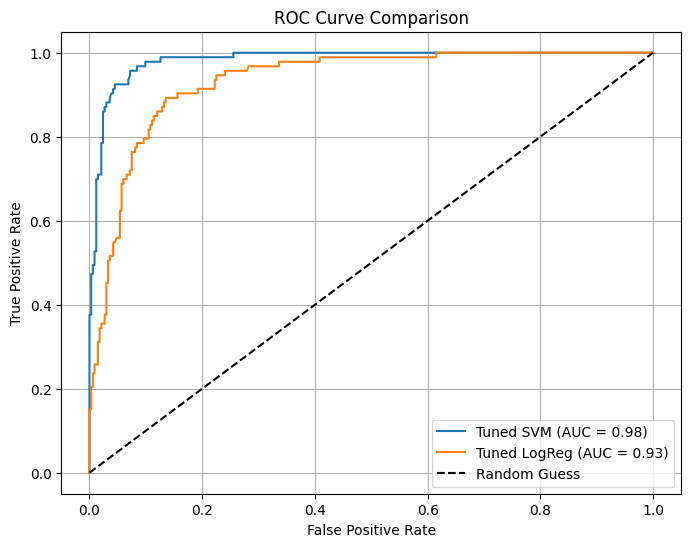

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid_svm = GridSearchCV(SVC(kernel='rbf', random_state=42, probability=True), param_grid_svm, refit=True, verbose=2)

print("Re-running Grid Search for SVM with probability=True...")
grid_svm.fit(X_train_scaled, y_train_smote)
print("Grid Search for SVM complete.")
print("\nBest parameters found for SVM after re-running:", grid_svm.best_params_)

probs_svm = grid_svm.predict_proba(X_test_scaled)[:, 1]
probs_log_reg = grid_log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_svm)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, probs_log_reg)

auc_svm = auc(fpr_svm, tpr_svm)
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(8, 6))

plt.plot(fpr_svm, tpr_svm, label=f'Tuned SVM (AUC = {auc_svm:.2f})')

plt.plot(fpr_log_reg, tpr_log_reg, label=f'Tuned LogReg (AUC = {auc_log_reg:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# --- 5. Final Touches ---
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()